In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid", context="talk", font_scale=0.8)
# cols = ['N', '#procs', 'p_t_mean', 'p_t_std', 'p_c_mean', 'p_c_std', 'np_t_mean', 'np_t_std', 'np_c_mean', 'np_c_std']
# data = pd.DataFrame(columns = cols+['instance'])
# for name in ['m5large', 'm5xlarge', 'm52xlarge', 'r5large', 'r5xlarge', 'r52xlarge', 'c5large', 'c5xlarge', 'c52xlarge']:
#     df = pd.read_csv(name+'.txt', sep=",", header=None, names=cols)
#     df['instance'] = [name]*60
#     data = pd.concat([data, df])
# data.to_pickle("pf.pkl")

In [2]:
data = pd.read_pickle("pf.pkl")
data.head()

,N,#procs,p_t_mean,p_t_std,p_c_mean,p_c_std,np_t_mean,np_t_std,np_c_mean,np_c_std,instance
0,1,1,0.00234,0.000177,20.0,40.0,0.000096,0.000002,0.0,0.0,m5large
1,1,2,0.00231,0.000093,45.0,47.2,0.000097,0.000001,0.0,0.0,m5large
2,1,4,0.00232,0.000040,10.0,30.0,0.000099,0.000002,0.0,0.0,m5large
3,1,8,0.00240,0.000103,30.0,45.8,0.000105,0.000016,0.0,0.0,m5large
4,1,16,0.00242,0.000038,45.0,47.2,0.000106,0.000018,10.0,30.0,m5large


In [3]:
new_data = []
for i in range(len(data)):
    temp = list(data.iloc[i][['N', '#procs', 'p_t_mean', 'p_t_std', 'p_c_mean', 'p_c_std', 'instance']])
    temp.append(True)
    new_data.append(temp)
    temp = list(data.iloc[i][['N', '#procs', 'np_t_mean', 'np_t_std', 'np_c_mean', 'np_c_std', 'instance']])
    temp.append(False)
    new_data.append(temp)
new_data = pd.DataFrame(new_data, columns=['N', '#procs', 'time_mean', 'time_std', 'cpu_mean', 'cpu_std', 'instance', 'parallel'])
new_data.head()

,N,#procs,time_mean,time_std,cpu_mean,cpu_std,instance,parallel
0,1,1,0.002340,0.000177,20.0,40.0,m5large,True
1,1,1,0.000096,0.000002,0.0,0.0,m5large,False
2,1,2,0.002310,0.000093,45.0,47.2,m5large,True
3,1,2,0.000097,0.000001,0.0,0.0,m5large,False
4,1,4,0.002320,0.000040,10.0,30.0,m5large,True


In [4]:
new_data.to_csv("parallel_results.csv")

In [5]:
m5large = new_data['instance'] == 'm5large'
m5xlarge = new_data['instance'] == 'm5xlarge'
m52xlarge = new_data['instance'] == 'm52xlarge'
r5large = new_data['instance'] == 'r5large'
r5xlarge = new_data['instance'] == 'r5xlarge'
r52xlarge = new_data['instance'] == 'r52xlarge'
c5large = new_data['instance'] == 'c5large'
c5xlarge = new_data['instance'] == 'c5xlarge'
c52xlarge = new_data['instance'] == 'c52xlarge'

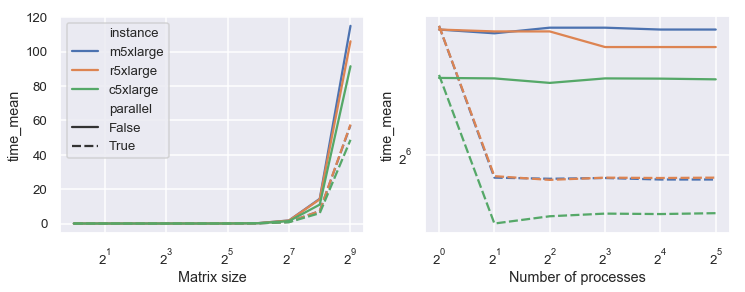

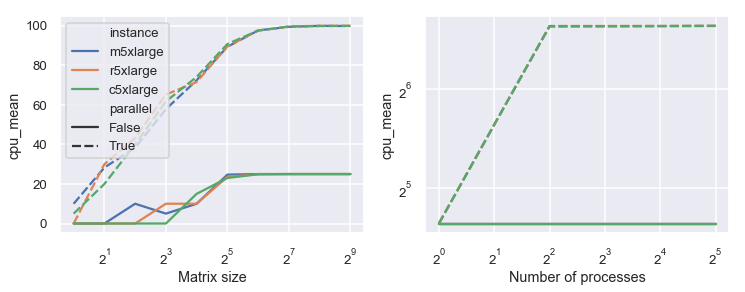

In [6]:
def mylineplot(data, criterion):
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(12, 4))

    sns.lineplot(x='N', y=criterion, hue='instance', style='parallel',data=data[data['#procs']==16], ax=ax1)
    ax1.set_xlabel('Matrix size')
    #ax1.set_ylabel('Wall time (s)')
    ax1.set_xscale('log', basex=2)
    ax2.set_yscale('log', basey=2)

    sns.lineplot(x='#procs', y=criterion, hue='instance', style='parallel', data=data[data['N']==512], ax=ax2, legend=None)
    ax2.set_xlabel('Number of processes')
    #ax2.set_ylabel('Wall time (s)')
    ax2.set_xscale('log', basex=2)
    ax2.set_yscale('log', basey=2)
    


    """
    sns.lineplot(x='N', y='p_t_mean', hue='instance', style='instance',data=data_part, ax=ax1)
    sns.lineplot(x='N', y='np_t_mean', hue='instance', style='instance',data=data_part, ax=ax1, legend=None)
    ax1.set_xlabel('Matrix Size')
    ax1.set_ylabel('Number of reviews')
    """
# xlarge series
mylineplot(new_data[m5xlarge+r5xlarge+c5xlarge], 'time_mean')
mylineplot(new_data[m5xlarge+r5xlarge+c5xlarge], 'cpu_mean')

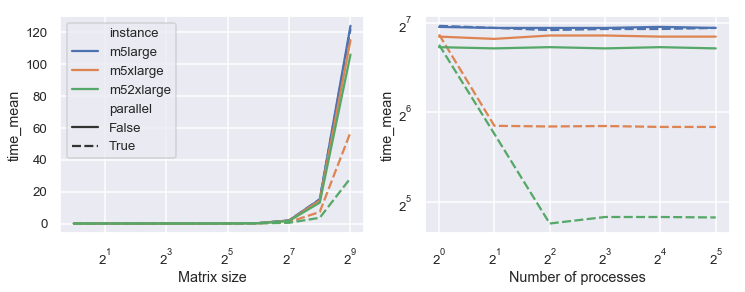

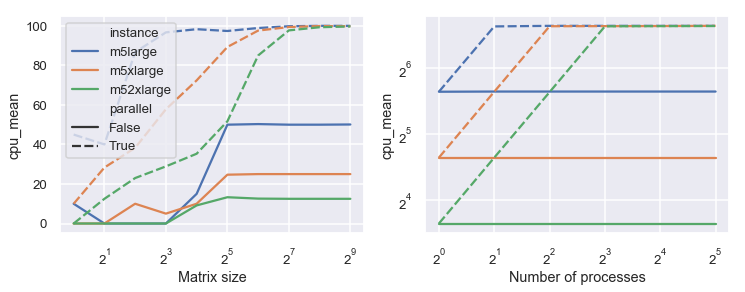

In [7]:
# m series
mylineplot(new_data[m5large+m5xlarge+m52xlarge], 'time_mean')
mylineplot(new_data[m5large+m5xlarge+m52xlarge], 'cpu_mean')

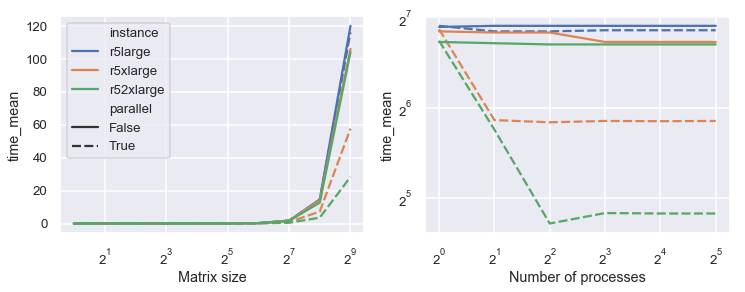

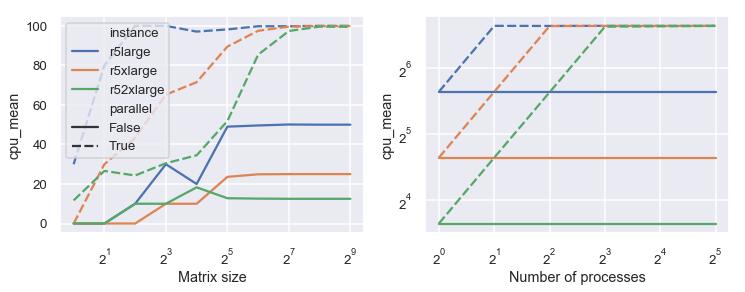

In [8]:
# r series
mylineplot(new_data[r5large+r5xlarge+r52xlarge], 'time_mean')
mylineplot(new_data[r5large+r5xlarge+r52xlarge], 'cpu_mean')

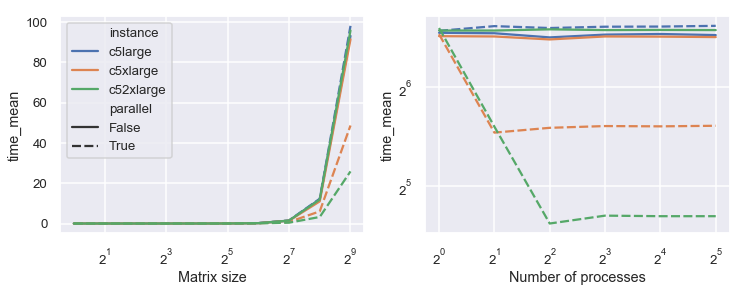

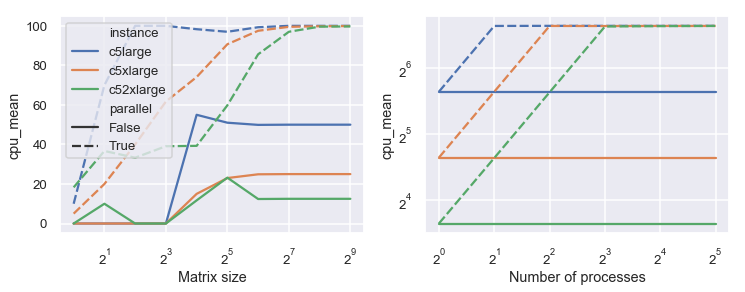

In [9]:
# c series
mylineplot(new_data[c5large+c5xlarge+c52xlarge], 'time_mean')
mylineplot(new_data[c5large+c5xlarge+c52xlarge], 'cpu_mean')